Data Preparation

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
import pandas as pd


data1 = pd.read_csv('/content/drive/MyDrive/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv')


data2 = pd.read_csv('/content/drive/MyDrive/CSV Files/Training and Testing Sets/UNSW_NB15_testing-set.csv')


In [ ]:
data = pd.concat([data1, data2])

In [ ]:
print(data.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt  

In [ ]:
data.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


data visualization

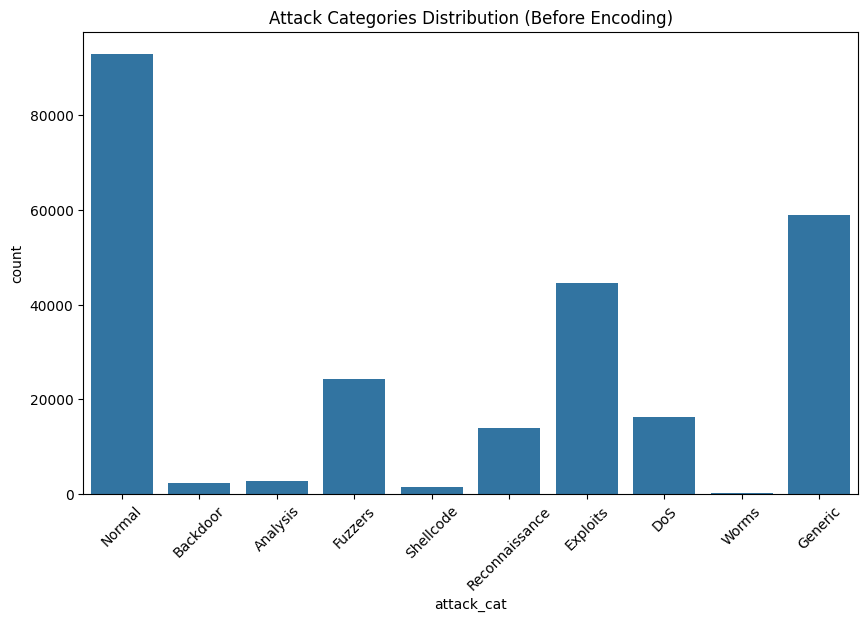

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Value counts for attack_cat before encoding
plt.figure(figsize=(10, 6))
sns.countplot(x='attack_cat', data=data)
plt.title('Attack Categories Distribution (Before Encoding)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Check the distribution of labels
print(data['attack_cat'].value_counts())

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


In [ ]:
# Drop rows with missing values
data = data.dropna()

In [ ]:
data.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


In [ ]:
# Display basic information about the dataset after dropping missing values
print("After dropping missing values:")
print(data.info())

After dropping missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 

In [ ]:
# Drop columns with missing values
data_cleaned_columns = data.dropna(axis=1)

In [ ]:
# Splitting features and labels
X = data.drop(columns=['attack_cat'])  # Features
y = data['attack_cat']  # Labels

In [ ]:
# Display processed data
print(X.head())
print(y.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  ...                 1                 1               1             0   
1  ...                 1                 1               2             0   
2  ...                 1                 1               3             0   
3  ...                 1                 1               3             1   
4  ...                 2                 1              40             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm

In [ ]:
# Select only numerical features for scaling
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform them
features_scaled = scaler.fit_transform(numerical_features)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
# Encoding categorical features
categorical_features = data.select_dtypes(include=['object'])

In [ ]:
# Use OneHotEncoder for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(categorical_features)

In [ ]:
# Combine scaled numerical features with encoded categorical features
import numpy as np
features_combined = np.hstack((features_scaled, categorical_encoded))

In [ ]:
# Label Encoding for the target variable if it is categorical
label_encoder_attack = LabelEncoder()
labels_encoded = label_encoder_attack.fit_transform(y)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_combined, labels_encoded, test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Value counts for each class before SMOTE
before_smote_counts = pd.Series(y_train).value_counts()
print("Class distribution before SMOTE:")
print(before_smote_counts)

Class distribution before SMOTE:
6    74387
5    47334
3    35445
4    19415
2    13061
7    11135
0     2158
1     1861
8     1202
9      140
Name: count, dtype: int64


In [ ]:
# Value counts for each class after SMOTE
after_smote_counts = pd.Series(y_train_resampled).value_counts()
print("Class distribution after SMOTE:")
print(after_smote_counts)


Class distribution after SMOTE:
3    74387
5    74387
6    74387
4    74387
2    74387
7    74387
0    74387
8    74387
1    74387
9    74387
Name: count, dtype: int64


In [ ]:
from tensorflow.keras import layers, models

# Define the autoencoder model
input_dim = X_train_resampled.shape[1]
encoding_dim = 7

In [ ]:
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=20, batch_size=64, shuffle=True, validation_data=(X_test, X_test))

# Extract the encoder part
encoder_model = models.Model(input_layer, encoded)


Epoch 1/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.1428 - val_loss: 0.1474
Epoch 2/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.1195 - val_loss: 0.1460
Epoch 3/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1190 - val_loss: 0.1457
Epoch 4/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1201 - val_loss: 0.1454
Epoch 5/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1174 - val_loss: 0.1452
Epoch 6/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1188 - val_loss: 0.1450
Epoch 7/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.1170 - val_loss: 0.1449
Epoch 8/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1175 - val_loss: 0.1448
Epoch 9/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1192 - val_loss: 0.1447
Epoch 10/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.1171 - val_loss: 0.1447
Epoch 11/20
11623/11623 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.1150 - val_loss: 0.14

In [ ]:
# Extract the encoder part
encoder_model = models.Model(input_layer, encoded)

X_train_encoded = encoder_model.predict(X_train_resampled)
X_test_encoded = encoder_model.predict(X_test)

23246/23246 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# Summary of the autoencoder architecture
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 204)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │           1,435 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 204)                 │           1,632 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,203 (35.95 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,136 (23.97 KB)

In [ ]:
print(f'X_train shape: {X_train_encoded.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test_encoded.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (743870, 7)
y_train shape: (206138,)
X_test shape: (51535, 7)
y_test shape: (51535,)


In [ ]:

X_train_tft = X_train_encoded.reshape((X_train_encoded.shape[0], 7, 1))
X_test_tft = X_test_encoded.reshape((X_test_encoded.shape[0], 7, 1))

print(f"Reshaped X_train_tft shape: {X_train_tft.shape}")
print(f"Reshaped X_test_tft shape: {X_test_tft.shape}")

Reshaped X_train_tft shape: (743870, 7, 1)
Reshaped X_test_tft shape: (51535, 7, 1)


In [ ]:
print(f'X_train_tft shape: {X_train_tft.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test_tft shape: {X_test_tft.shape}')
print(f'y_test shape: {y_test.shape}')


X_train_tft shape: (743870, 7, 1)
y_train shape: (206138,)
X_test_tft shape: (51535, 7, 1)
y_test shape: (51535,)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, MultiHeadAttention, Concatenate, LayerNormalization, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K


In [ ]:
# Gated Residual Network (GRN)
def GRN(x, units):
    # Feedforward with Dense layers
    x_in = Dense(units)(x)
    x_in = LayerNormalization()(x_in)

    # Gating mechanism
    gating = Dense(units, activation='sigmoid')(x)
    return x_in * gating

In [ ]:
# Temporal Attention Layer
def temporal_attention(inputs, units):
    attn_output = MultiHeadAttention(num_heads=2, key_dim=units)(inputs, inputs)
    return attn_output

In [ ]:
# Define the TFT model with LSTM, Temporal Attention, and GRN
def build_tft_model(input_shape, num_classes):
    # Input layer for dynamic features (time-series)
    dynamic_inputs = Input(shape=(input_shape[0], input_shape[1]), name="dynamic_inputs")

    # LSTM Encoder for dynamic features
    lstm_encoded = LSTM(32, return_sequences=True)(dynamic_inputs)  # Keep return_sequences=True for attention
    lstm_encoded = Dropout(0.4)(lstm_encoded)

    # Apply Temporal Attention to LSTM output
    attention_output = temporal_attention(lstm_encoded, units=32)
    attention_output = Dropout(0.4)(attention_output)

    # Apply GRN to attention output
    grn_output = GRN(attention_output, units=32)

    # Flatten the GRN output for the final dense layers
    flattened_output = Lambda(lambda x: K.mean(x, axis=1))(grn_output)  # Mean pooling over time

    # Dense output layers
    dense_out = Dense(32, activation='relu')(flattened_output)
    final_output = Dense(num_classes, activation='softmax')(dense_out)

    # Define the model
    model = Model(inputs=dynamic_inputs, outputs=final_output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# 1. Instantiate the TFT Model
num_classes = len(np.unique(y_train))  # Number of unique classes in your labels
input_shape = (X_train_tft.shape[1], X_train_tft.shape[2])  # (timesteps, features)
tft_model = build_tft_model(input_shape, num_classes)

In [ ]:

# 2. Train the Model
history = tft_model.fit(X_train_tft, y_train_resampled,
                         validation_data=(X_test_tft, y_test),
                         epochs= 15,
                         batch_size=32)

Epoch 1/15
23246/23246 ━━━━━━━━━━━━━━━━━━━━ 209s 9ms/step - accuracy: 0.9909 - loss: 0.0312 - val_accuracy: 0.9932 - val_loss: 0.0270
Epoch 2/15
23246/23246 ━━━━━━━━━━━━━━━━━━━━ 257s 9ms/step - accuracy: 0.9912 - loss: 0.0306 - val_accuracy: 0.9932 - val_loss: 0.0280
Epoch 3/15
23246/23246 ━━━━━━━━━━━━━━━━━━━━ 258s 9ms/step - accuracy: 0.9914 - loss: 0.0291 - val_accuracy: 0.9938 - val_loss: 0.0273
Epoch 4/15
23246/23246 ━━━━━━━━━━━━━━━━━━━━ 203s 9ms/step - accuracy: 0.9917 - loss: 0.0286 - val_accuracy: 0.9906 - val_loss: 0.0454
Epoch 5/15
23246/23246 ━━━━━━━━━━━━━━━━━━━━ 206s 9ms/step - accuracy: 0.9920 - loss: 0.0279 - val_accuracy: 0.9930 - val_loss: 0.0312
Epoch 6/15
23246/23246 ━━━━━━━━━━━━━━━━━━━━ 257s 9ms/step - accuracy: 0.9923 - loss: 0.0268 - val_accuracy: 0.9925 - val_loss: 0.0330
Epoch 7/15
23246/23246 ━━━━━━━━━━━━━━━━━━━━ 200s 9ms/step - accuracy: 0.9923 - loss: 0.0270 - val_accuracy: 0.9934 - val_loss: 0.0296
Epoch 8/15
23246/23246 ━━━━━━━━━━━━━━━━━━━━ 201s 9ms/step - ac

In [ ]:
# 3. Evaluate the Model
loss, accuracy = tft_model.evaluate(X_test_tft, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# 4. Make Predictions
y_pred = np.argmax(tft_model.predict(X_test_tft), axis=-1)


1611/1611 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9936 - loss: 0.0302
Test Loss: 0.03062121383845806
Test Accuracy: 0.9935771822929382
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


                precision    recall  f1-score   support

      Analysis       0.93      0.98      0.95       519
      Backdoor       0.76      0.99      0.86       468
           DoS       0.98      0.99      0.99      3292
      Exploits       1.00      1.00      1.00      9080
       Fuzzers       0.99      0.99      0.99      4831
       Generic       1.00      0.98      0.99     11537
        Normal       1.00      1.00      1.00     18613
Reconnaissance       1.00      1.00      1.00      2852
     Shellcode       0.98      1.00      0.99       309
         Worms       0.73      0.97      0.84        34

      accuracy                           0.99     51535
     macro avg       0.94      0.99      0.96     51535
  weighted avg       0.99      0.99      0.99     51535



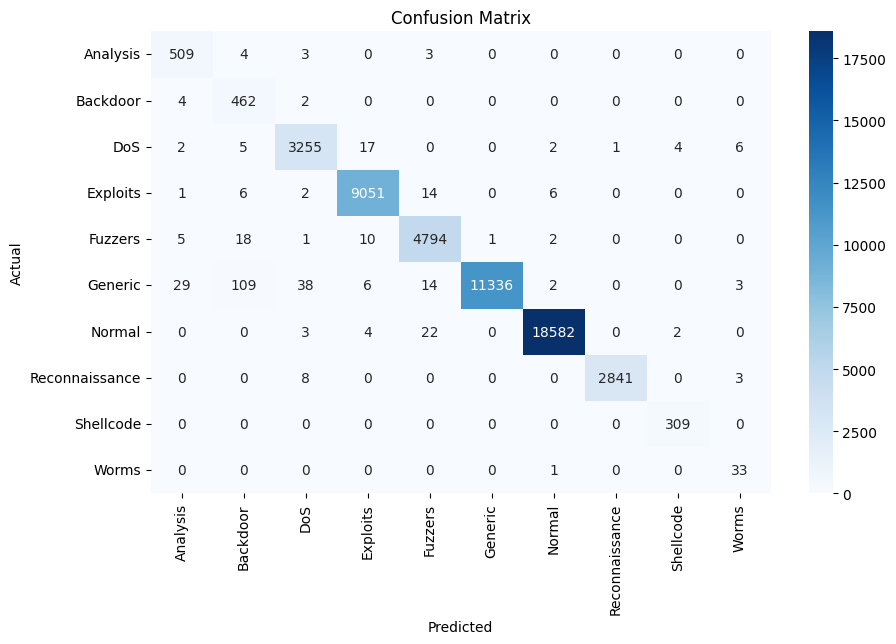

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder_attack.classes_)
print(report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_attack.classes_, yticklabels=label_encoder_attack.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


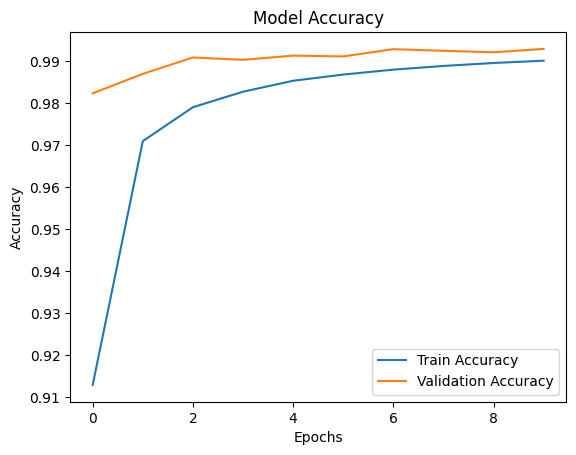

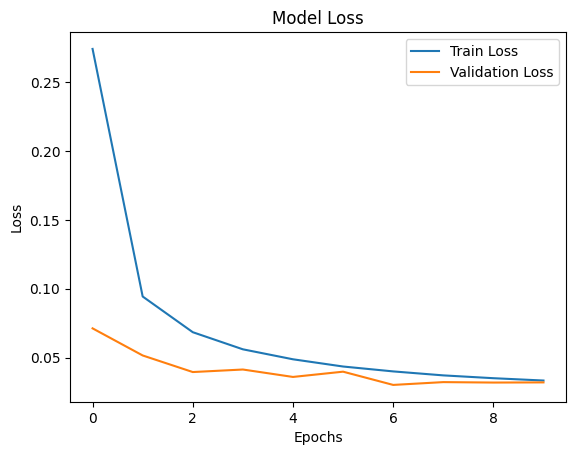

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming you have already generated predictions and actual values
# y_pred is your predicted labels
# y_test is your true labels

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Extracting precision, recall, and F1-scores for each class
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Initialize variables for summing up performance metrics
precision_sum = 0
recall_sum = 0
f1_sum = 0

# Loop over each class and sum the values for precision, recall, and F1-score
for cls in classes:
    precision_sum += report[cls]['precision']
    recall_sum += report[cls]['recall']
    f1_sum += report[cls]['f1-score']

# Calculate average metrics (macro average)
n_classes = len(classes)
average_precision = precision_sum / n_classes
average_recall = recall_sum / n_classes
average_f1 = f1_sum / n_classes

# Display the results
print(f'Average Precision (Macro): {average_precision:.2f}')
print(f'Average Recall (Macro): {average_recall:.2f}')
print(f'Average F1-Score (Macro): {average_f1:.2f}')

# For accuracy, we can directly extract it
accuracy = report['accuracy']
print(f'Accuracy: {accuracy:.2f}')


Average Precision (Macro): 0.94
Average Recall (Macro): 0.99
Average F1-Score (Macro): 0.96
Accuracy: 0.99


In [ ]:


!pip install gTTS playsound


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=64032f28fc0e313fac90c3735f4b2c6db8220a94710220497948f4330ff49501
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [ ]:
!pip install pygame


In [ ]:
from gtts import gTTS
from IPython.display import Audio, display

# Function to play voice alert
def play_voice_alert(message):
    tts = gTTS(message)
    filename = "alert.mp3"
    tts.save(filename)
    display(Audio(filename, autoplay=True))

# Function to generate alert messages for attacks
def generate_attack_alert_message(y_pred, y_test):
    unique, counts = np.unique(y_pred, return_counts=True)
    class_distribution = dict(zip(unique, counts))

    message = "Attack detection results:\n"
    for cls, count in class_distribution.items():
        accuracy = np.mean(y_pred[y_test == cls] == cls) * 100
        message += f"Class '{label_encoder_attack.classes_[cls]}': Detected {count} times with {accuracy:.2f}% confidence.\n"

    return message

# Generate attack alert message
alert_message_attack = generate_attack_alert_message(y_pred, y_test)

# Play voice alert
play_voice_alert(alert_message_attack)

# Print the alert message for clarity
print(alert_message_attack)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test are the true labels and y_pred are the predicted labels
# Generate the classification report as a dictionary for full precision
report = classification_report(y_test, y_pred, target_names=label_encoder_attack.classes_, output_dict=True)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Initialize a list to store metrics for each class
class_metrics = []

# Loop through each class to extract precision, recall, F1-score, support, and calculate accuracy
for i, class_name in enumerate(label_encoder_attack.classes_):
    if class_name not in ['accuracy', 'macro avg', 'weighted avg']:  # Exclude summary values
        TP = conf_matrix[i, i]  # True Positives
        FP = conf_matrix[:, i].sum() - TP  # False Positives
        FN = conf_matrix[i, :].sum() - TP  # False Negatives
        TN = conf_matrix.sum() - (TP + FP + FN)  # True Negatives

        # Calculate accuracy for the class
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0

        # Append all metrics to the list
        class_metrics.append({
            'Class': class_name,
            'Accuracy': accuracy,
            'Precision': report[class_name]['precision'],
            'Recall': report[class_name]['recall'],
            'F1-Score': report[class_name]['f1-score'],
            'Support': report[class_name]['support']
        })

# Print the results for each class in the desired format
for metrics in class_metrics:
    print(f"Class: {metrics['Class']}")
    print(f"  Accuracy: {metrics['Accuracy']:.10f}")
    print(f"  Precision: {metrics['Precision']:.10f}")
    print(f"  Recall: {metrics['Recall']:.10f}")
    print(f"  F1-Score: {metrics['F1-Score']:.10f}")
    print(f"  Support: {metrics['Support']}\n")

# Visualize the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_attack.classes_, yticklabels=label_encoder_attack.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming you already have y_test (true labels) and y_pred (predicted labels)
report = classification_report(y_test, y_pred, output_dict=True)

# Initialize sums for precision, recall, and F1-score
# Removed accuracy_sum as it's not part of the per-class metrics
precision_sum = 0
recall_sum = 0
f1_sum = 0

# Exclude 'accuracy', 'macro avg', 'weighted avg', and work only with class-specific metrics
classes = list(report.keys())[:-3]  # This excludes accuracy, macro avg, weighted avg

# Loop over each class to calculate the sum of precision, recall, and F1-score
# Removed accuracy_sum from the loop as it's not in the class dictionary
for cls in classes:
    precision_sum += report[cls]['precision']
    recall_sum += report[cls]['recall']
    f1_sum += report[cls]['f1-score']

# Calculate the macro average (average over all classes)
n_classes = len(classes)
# Calculate overall accuracy from the report
average_accuracy = report['accuracy']
average_precision = precision_sum / n_classes
average_recall = recall_sum / n_classes
average_f1_score = f1_sum / n_classes

# Print the macro averages
print(f"Average Accuracy (Macro): {average_accuracy:.10f}") # Changed Print to print
print(f"Average Precision (Macro): {average_precision:.10f}")
print(f"Average Recall (Macro): {average_recall:.10f}")
print(f"Average F1-Score (Macro): {average_f1_score:.10f}")